In [7]:
import pandas as pd
import networkx as nx
from itertools import combinations
import matplotlib.pyplot as plt
import numpy as np


Data Preview:
         thread_subject     username            page_name
0   TimeZone (I guess)           YMS      TalkQ10000.json
1            No subject  Estopedist1   TalkQ10009180.json
2              Leitung            UV    TalkQ1001338.json
3            No subject  Estopedist1  TalkQ100137687.json
4            No subject        Trade  TalkQ100148221.json

Network Summary:
Number of Nodes (Editors): 6101
Number of Edges (Social Connections): 7252


F:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45817 (\N{HANGUL SYLLABLE DANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 2327 (\N{DEVANAGARI LETTER GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
F:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 2361 (\N{DEVA

F:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26704 (\N{CJK UNIFIED IDEOGRAPH-6850}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12371 (\N{HIRAGANA LETTER KO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26690 (\N{CJK UNIFIED IDEOGRAPH-6842}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 40442 (\N{CJK UNIFIED IDEOGRAPH-9DFA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 28149 (\N{CJK UNIFIED IDEOGRAPH-6DF5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: U

F:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12373 (\N{HIRAGANA LETTER SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12360 (\N{HIRAGANA LETTER E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12412 (\N{HIRAGANA LETTER BO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51023 (\N{HANGUL SYLLABLE EUS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 24904 (\N{CJK UNIFIED IDEOGRAPH-6148}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 22993 

F:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 28381 (\N{CJK UNIFIED IDEOGRAPH-6EDD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 27810 (\N{CJK UNIFIED IDEOGRAPH-6CA2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26388 (\N{CJK UNIFIED IDEOGRAPH-6714}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 37070 (\N{CJK UNIFIED IDEOGRAPH-90CE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 2980 (\N{TAMIL LETTER TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserW

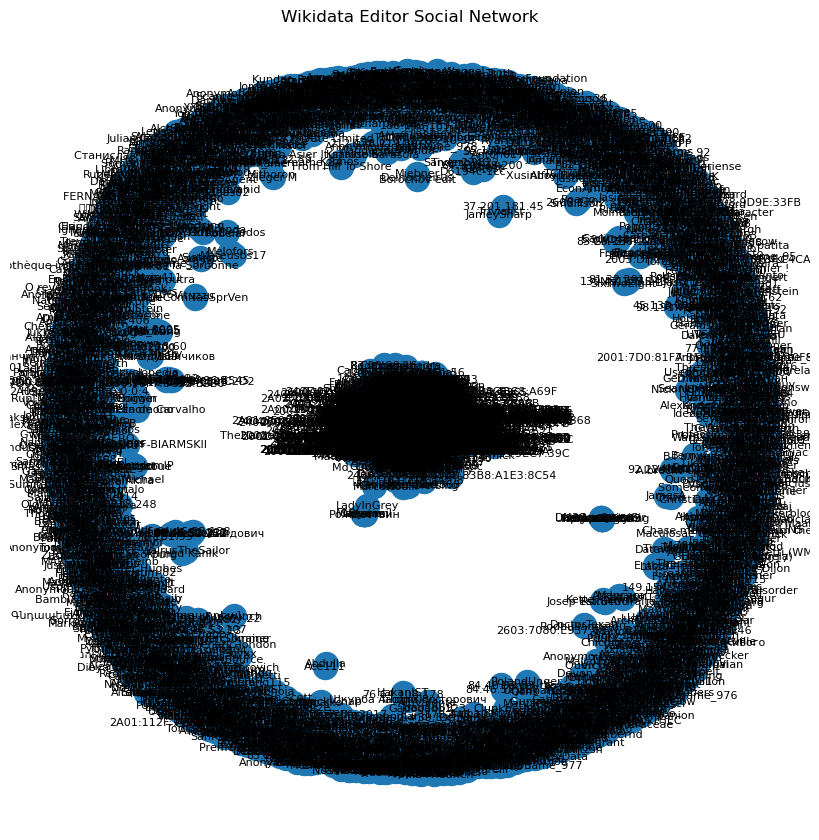

In [5]:
#TASKA
df = pd.read_csv('ITEMS.csv')
print("Data Preview:")
print(df.head())

G = nx.Graph()

unique_editors = df['username'].unique()
for editor in unique_editors:
    G.add_node(editor)

grouped = df.groupby(['page_name', 'thread_subject'])
for (page, thread), group in grouped:
    editors_in_group = group['username'].unique()
    for editor1, editor2 in combinations(editors_in_group, 2):
        if G.has_edge(editor1, editor2):
            G[editor1][editor2]['weight'] += 1
            G[editor1][editor2]['contexts'].append((page, thread))
        else:
            G.add_edge(editor1, editor2, weight=1, contexts=[(page, thread)])

print("\nNetwork Summary:")
print("Number of Nodes (Editors):", G.number_of_nodes())
print("Number of Edges (Social Connections):", G.number_of_edges())

# visualize
plt.figure(figsize=(8,8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=300, font_size=8)
plt.title("Wikidata Editor Social Network")
plt.show()


Number of nodes: 6101
Number of edges: 7252
Average degree: 2.3773151942304542
Maximum degree: 507
Number of connected components: 2716
Size of the largest connected component: 3198
Diameter of LCC: 11
Average shortest path length (LCC): 3.638402011892403
Average clustering coefficient: 0.1551233974230592


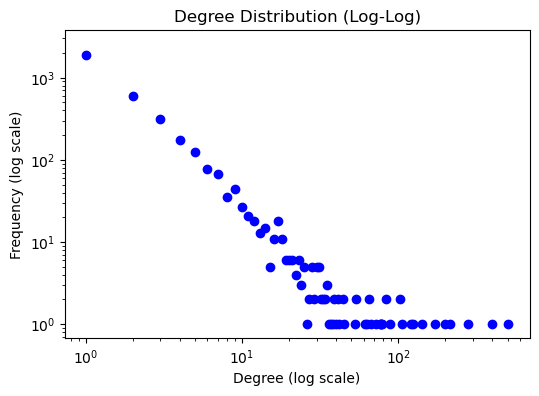


Random Network Comparison:
  Diameter: 25
  Avg shortest path: 9.898059134360782
  Avg clustering: 0.0006197266646373351


In [9]:
#TASKB
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
degrees = [d for _, d in G.degree()]
avg_degree = np.mean(degrees)
max_degree = np.max(degrees)

print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)
print("Average degree:", avg_degree)
print("Maximum degree:", max_degree)

components = list(nx.connected_components(G))
print("Number of connected components:", len(components))

#LCC
largest_cc = max(components, key=len)
G_lcc = G.subgraph(largest_cc).copy()
print("Size of the largest connected component:", len(G_lcc))

#diameter and average shortest path length
if nx.is_connected(G_lcc):
    diameter = nx.diameter(G_lcc)
    avg_shortest_path = nx.average_shortest_path_length(G_lcc)
    print("Diameter of LCC:", diameter)
    print("Average shortest path length (LCC):", avg_shortest_path)
else:
    print("Largest component is not fully connected.")

#clustering
avg_clustering = nx.average_clustering(G)
print("Average clustering coefficient:", avg_clustering)

#degree distribution
plt.figure(figsize=(6, 4))
hist = nx.degree_histogram(G)
plt.plot(range(len(hist)), hist, 'bo')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Degree (log scale)")
plt.ylabel("Frequency (log scale)")
plt.title("Degree Distribution (Log-Log)")
plt.show()

# comparison with a Random Network
n = num_nodes
p = avg_degree / (n - 1) if n > 1 else 0
G_random = nx.erdos_renyi_graph(n, p, seed=42)

components_rand = list(nx.connected_components(G_random))
largest_cc_rand = max(components_rand, key=len) if components_rand else set()
G_random_lcc = G_random.subgraph(largest_cc_rand).copy()

if nx.is_connected(G_random_lcc) and G_random_lcc.number_of_nodes() > 1:
    rand_diameter = nx.diameter(G_random_lcc)
    rand_avg_shortest = nx.average_shortest_path_length(G_random_lcc)
    rand_clustering = nx.average_clustering(G_random)
    print("\nRandom Network Comparison:")
    print("  Diameter:", rand_diameter)
    print("  Avg shortest path:", rand_avg_shortest)
    print("  Avg clustering:", rand_clustering)
else:
    print("Random graph largest component is not fully connected or too small.")


In [13]:
#TASKC
suspicious_editors = ['YMS', 'Estopedist1']
abnormal_scores = {'YMS': 10, 'Estopedist1': 20}

risk_scores = {}
for editor in G.nodes():
    if editor in suspicious_editors:
        continue
    risk = 0
    for s in suspicious_editors:
        try:
            d = nx.shortest_path_length(G, source=editor, target=s)
            risk += abnormal_scores[s] / d  
        except nx.NetworkXNoPath:
            continue
    risk_scores[editor] = risk


priority_list = sorted(risk_scores.items(), key=lambda x: x[1], reverse=True)
print("Priority List (Editor, Risk Score):")
for editor, score in priority_list[:10]:
    print(f"{editor}: {score:.2f}")



Priority List (Editor, Risk Score):
Llywelyn2000: 30.00
Infovarius: 30.00
Albmont: 30.00
Trade: 25.00
Conny: 25.00
Valentina.Anitnelav: 25.00
Ehitaja: 25.00
Fnielsen: 25.00
Jura1: 25.00
WiseWoman: 25.00
